# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# ID file dari Google Drive
file_id = "1JUMvV6h-VTVNtjsXaRC-tZOFzXBqFCog"

# Buat URL unduhan langsung
download_url = f"https://drive.google.com/uc?id={file_id}"

# Baca file CSV dengan Pandas
df = pd.read_csv(download_url)

# Tampilkan 5 baris pertama untuk memastikan dataset berhasil dimuat
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Meninjau jumlah baris dan kolom dalam dataset
print("Shape dataset tersebut:", df.shape)

Shape dataset tersebut: (2512, 16)


In [4]:
# Meninjau jenis data setiap kolom
print("Informasi Dataset :")
print(df.info())

Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

In [5]:
# Cek missing value dan duplikasi datanya
print(f'Missing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')

Missing values: 0
Duplicated values: 0


In [6]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [7]:
df_numeric = df.select_dtypes(include=['number'])
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("Jumlah outlier per kolom berdasarkan IQR:\n", outliers_iqr)

Jumlah outlier per kolom berdasarkan IQR:
 TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

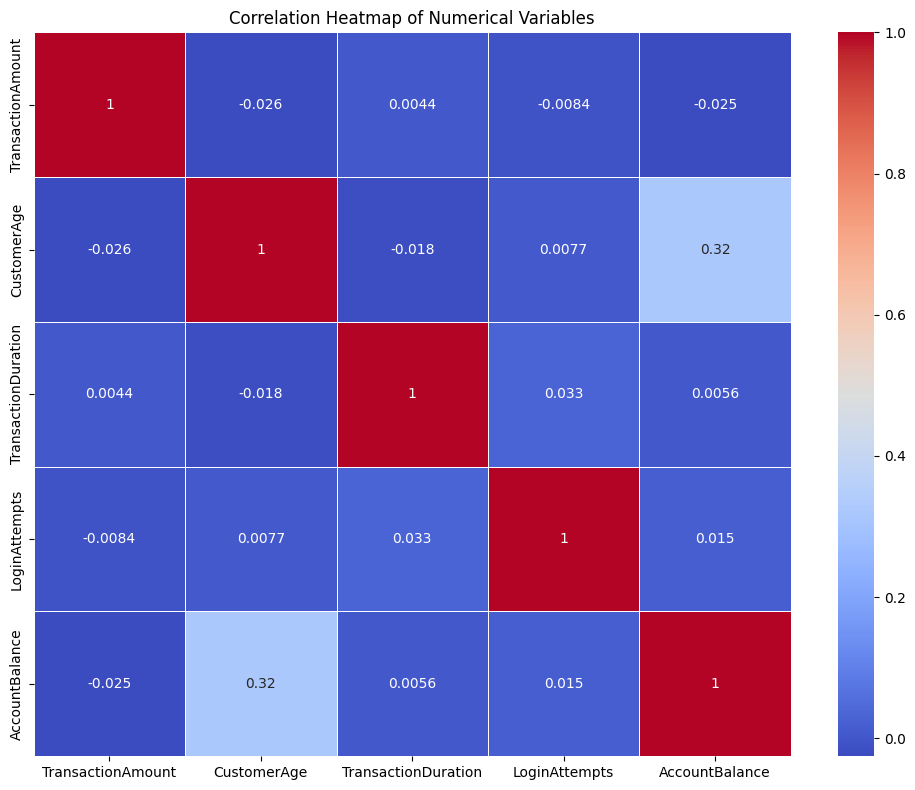

In [9]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

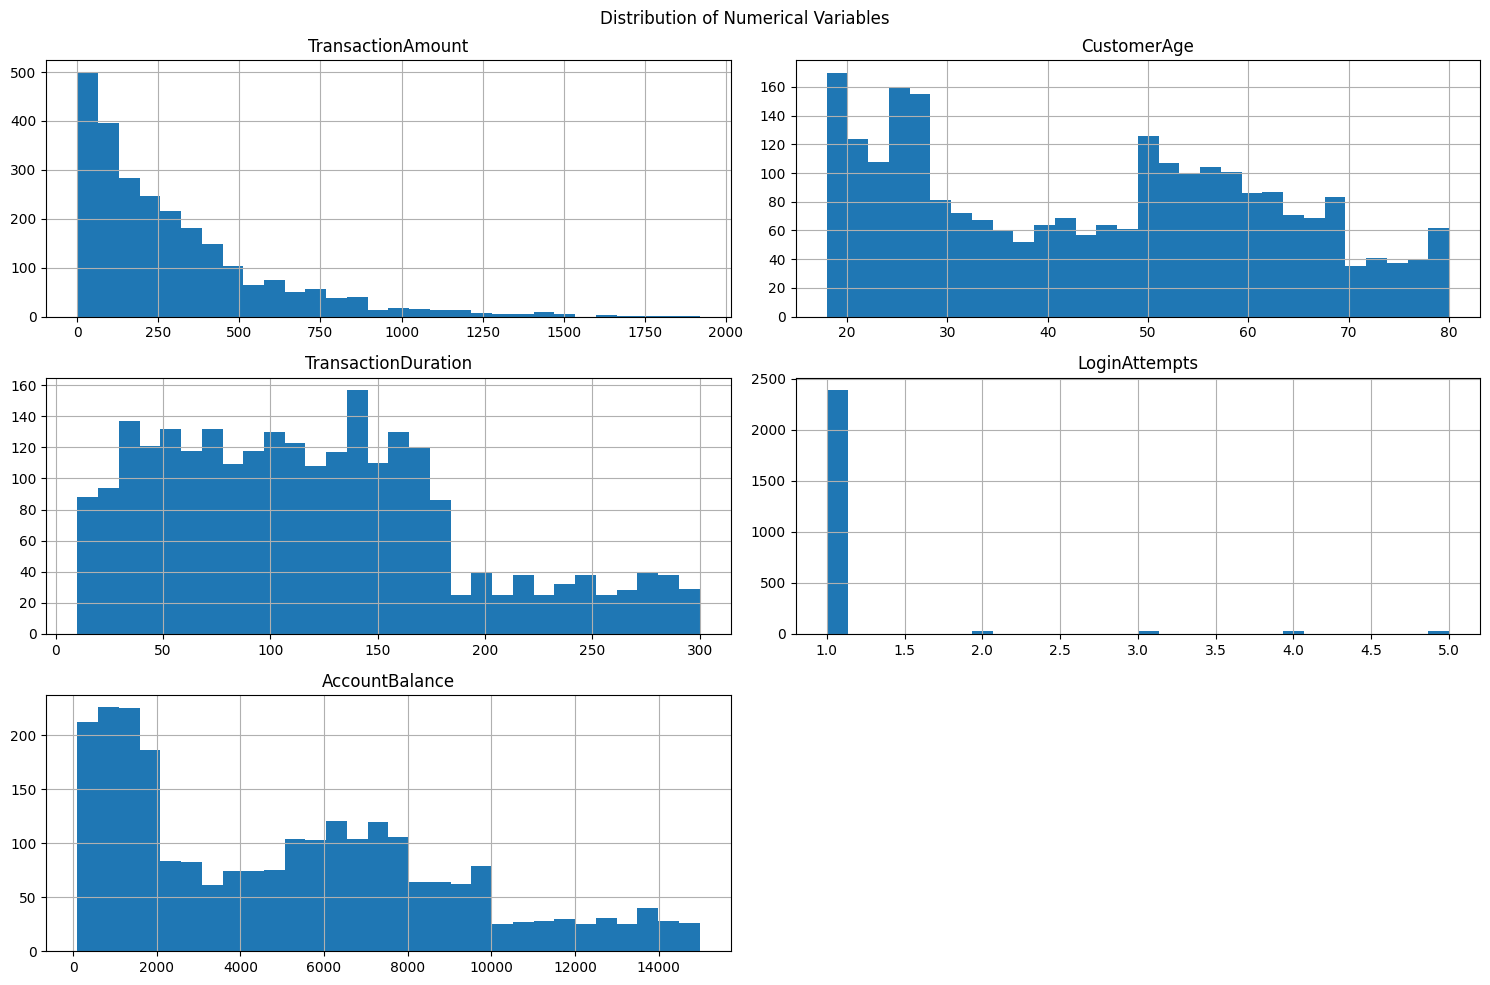

In [10]:
# Distribution of Numerical Variables
plt.figure(figsize=(15, 10))
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()

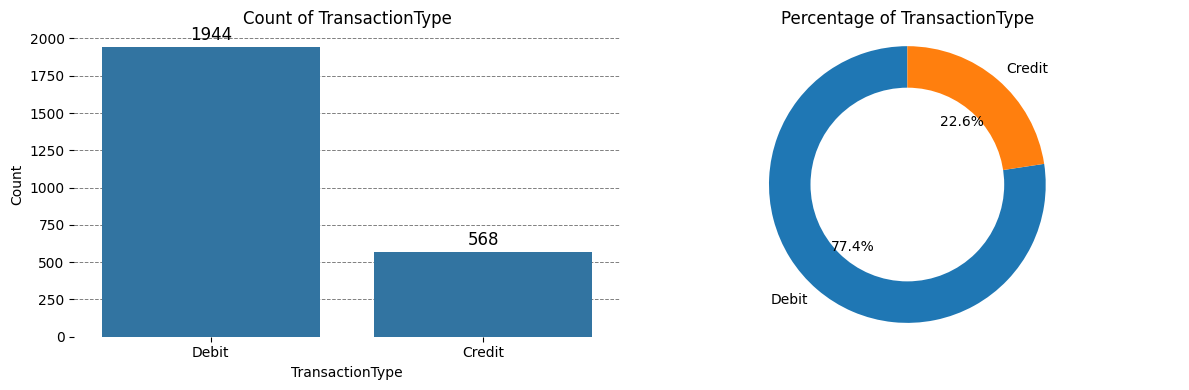

In [11]:
def plot_categorical_distribution(df, feature):
    num_categories = len(df[feature].unique())

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature, data=df, ax=axes[0])
    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')

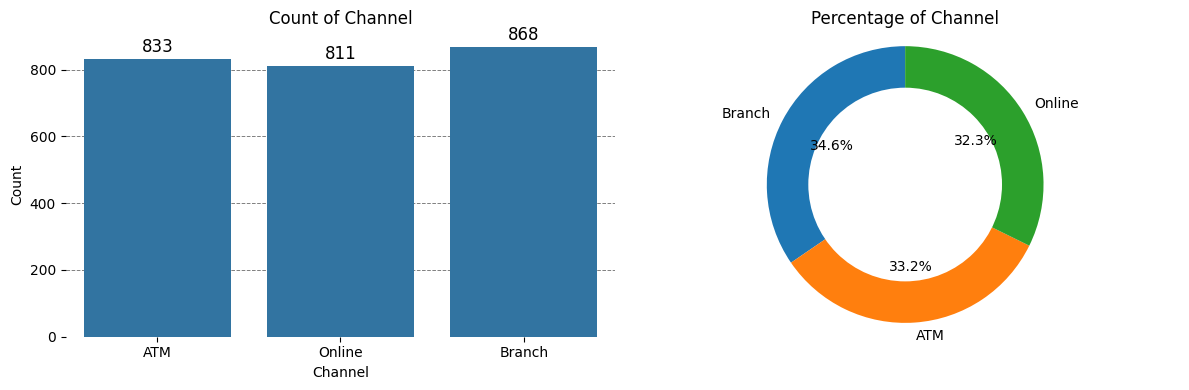

In [12]:
plot_categorical_distribution(df, 'Channel')

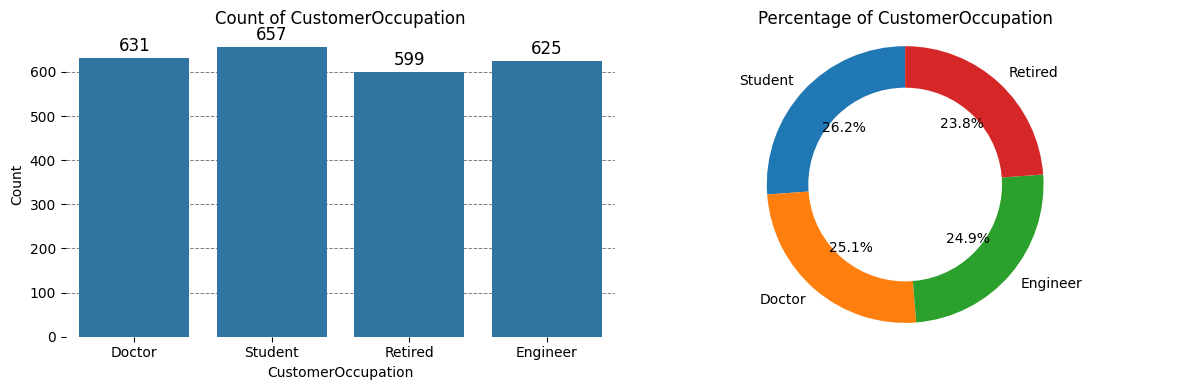

In [13]:
plot_categorical_distribution(df, 'CustomerOccupation')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
df_processed = df.copy()

In [15]:
# Convert date columns to datetime
date_columns = ['TransactionDate', 'PreviousTransactionDate']
for col in date_columns:
    df_processed[col] = pd.to_datetime(df_processed[col])

In [16]:
# memisahkan fitur numerikal dan kategorikal
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns

In [17]:
# Drop kolom yang tidak relevan atau unik untuk setiap transaksi
drop_cols = ['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'DeviceID', 'IP Address', 'MerchantID']
categorical_cols = [col for col in categorical_cols if col not in drop_cols]

In [18]:
# Encoding fitur kategorikal
label_enc = LabelEncoder()
for col in categorical_cols:
    df_processed[col] = label_enc.fit_transform(df_processed[col])

In [19]:
# Select features for clustering
selected_features = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance',
    'TransactionType', 'Channel', 'CustomerOccupation'
]

# Prepare feature matrix
X = df_processed[selected_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
# Definisikan kembali rentang K untuk clustering
K_range = range(2, 11)

# Hitung inertia dan silhouette score kembali
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

In [21]:
# KMeans Clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

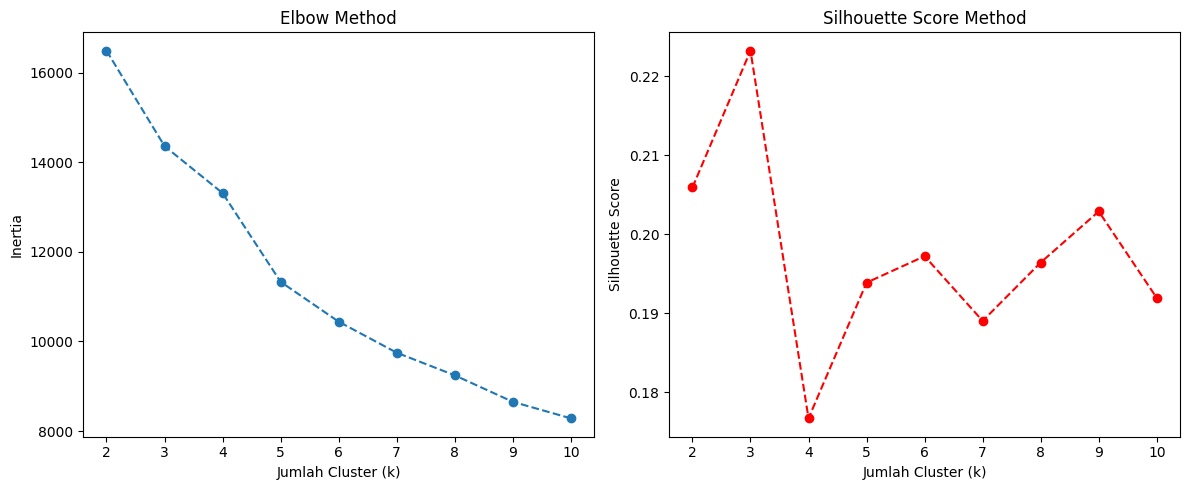

In [22]:
# Plot ulang hasil Elbow Method dan Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

In [23]:
# Menentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = K_range[np.argmax(silhouette_scores)]
optimal_k

3

In [24]:
# Evaluate KMeans clustering
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.176527306942415


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [25]:
# Feature Importance using Mutual Information
def get_feature_importance(X, labels):
    mi_scores = mutual_info_classif(X, labels)
    feature_indices = mi_scores.argsort()[::-1]
    return feature_indices

kmeans_important_features = get_feature_importance(X_scaled, kmeans_labels)
for idx in kmeans_important_features:
    print(f"{selected_features[idx]}")

CustomerOccupation
CustomerAge
AccountBalance
TransactionType
Channel
TransactionAmount
TransactionDuration
LoginAttempts


In [26]:
# Select features for clustering
features = ['LoginAttempts', 'AccountBalance', 'TransactionType', 'TransactionAmount', 'TransactionDuration']
X = df_processed[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [27]:
# KMeans Clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

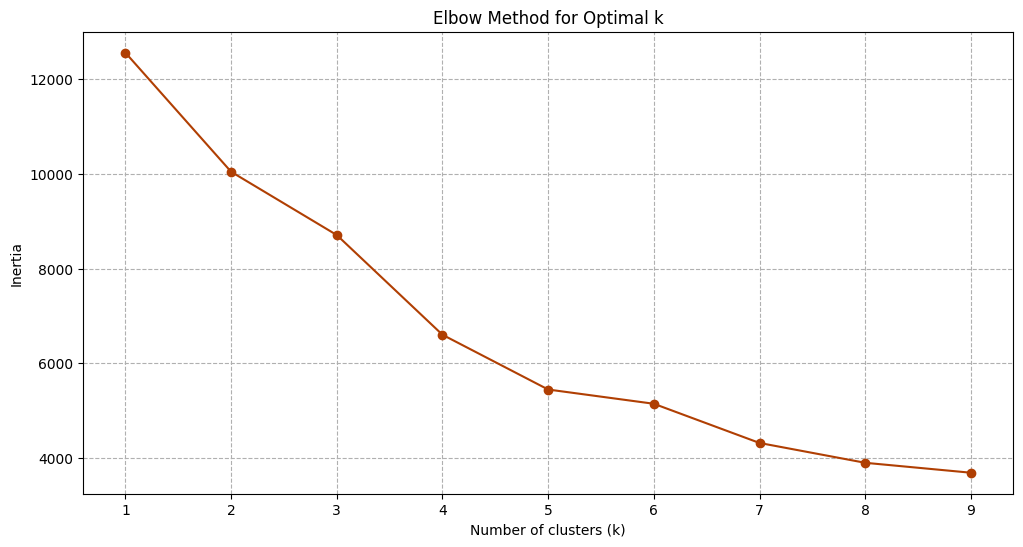

In [28]:
# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, marker='o', linestyle='-', color=sns.color_palette("YlOrBr", 10)[8])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--')
plt.show()

In [29]:
# Evaluate KMeans clustering
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.28227707818143855


In [30]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

# Menghitung jarak cluster ke centroid
df_processed['Cluster'] = kmeans_labels
df_processed['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Melihat potensi fraud berdasarkan jarak ke centroidnya
threshold = df_processed['DistanceToCentroid'].quantile(0.98)
potential_frauds = df_processed[df_processed['DistanceToCentroid'] > threshold]

print(f"Potensi penipuan terdeteksi: {len(potential_frauds)}")
display(potential_frauds)

Potensi penipuan terdeteksi: 51


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,DistanceToCentroid
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,1,24,D000046,55.154.161.250,M029,0,23,3,158,5,673.35,2024-11-04 08:11:38,2,7.060777
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,0,2,D000574,165.114.224.47,M012,2,54,1,30,1,8654.28,2024-11-04 08:06:53,3,6.650692
147,TX000148,AC00161,514.95,2023-04-13 18:37:48,1,27,D000109,23.92.205.75,M056,2,41,0,142,5,421.93,2024-11-04 08:10:01,2,6.829858
274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,0,18,D000476,50.202.8.53,M074,0,54,1,174,5,323.69,2024-11-04 08:11:44,2,7.195453
340,TX000341,AC00107,1830.00,2023-03-01 16:31:58,1,35,D000436,62.27.235.199,M082,2,55,1,238,1,2235.70,2024-11-04 08:11:59,3,7.526399
375,TX000376,AC00316,1392.54,2023-11-20 16:51:14,1,12,D000113,63.67.150.226,M013,1,41,0,297,1,13347.69,2024-11-04 08:09:15,3,7.043627
394,TX000395,AC00326,6.30,2023-12-14 18:52:54,1,8,D000539,210.160.90.52,M017,1,80,2,283,5,7697.68,2024-11-04 08:12:13,2,7.683208
414,TX000415,AC00495,83.50,2023-05-15 18:47:35,1,9,D000446,34.92.221.183,M100,1,61,2,91,5,1749.79,2024-11-04 08:07:22,2,7.201084
463,TX000464,AC00417,302.16,2023-10-18 17:47:52,1,18,D000123,84.237.126.96,M014,2,80,2,138,5,3876.61,2024-11-04 08:07:38,2,6.914807
491,TX000492,AC00318,505.19,2023-03-14 16:25:04,1,18,D000660,60.89.202.192,M023,0,30,0,128,5,5326.68,2024-11-04 08:10:19,2,6.744122


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [31]:
# Visualize Clustering Results using PCA
def plot_clustering(X_scaled, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.show()

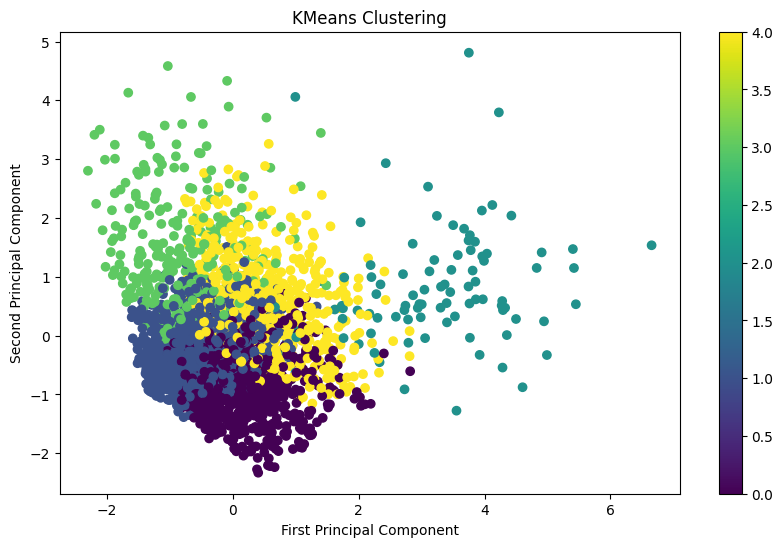

In [32]:
# Plot KMeans
plot_clustering(X_scaled, kmeans_labels, 'KMeans Clustering')

## **e. Analisis dan Interpretasi Hasil Cluster**

In [36]:
# Inversi data ke skala aslinya
X_original = scaler.inverse_transform(X_scaled)
df_original = pd.DataFrame(X_original, columns=features)
df_original['Cluster'] = kmeans_labels

In [45]:
# Tampilkan distribusi cluster
print("\n--- Distribusi Cluster KMeans ---")
print(df['Cluster'].value_counts())


--- Distribusi Cluster KMeans ---
Cluster
1    859
0    739
4    526
3    293
2     95
Name: count, dtype: int64


In [41]:
# Agregasi numerik (min, max, mean)
numeric_summary = df_original.groupby('Cluster').agg(['min', 'max', 'mean'])

# Agregasi kategorikal (modus)
categorical_summary = df_processed.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode().iloc[0])

# Menampilkan hasil
print("Ringkasan Numerik Per Cluster:\n", numeric_summary)
print("\nRingkasan Kategorikal Per Cluster:\n", categorical_summary)


Ringkasan Numerik Per Cluster:
         LoginAttempts                AccountBalance                         \
                  min  max      mean            min       max         mean   
Cluster                                                                      
0                 1.0  2.0  1.010825        5018.67  14977.99  8789.024912   
1                 1.0  2.0  1.009313         101.25   6189.24  2146.090442   
2                 3.0  5.0  4.010526         271.78  14851.28  5461.643053   
3                 1.0  2.0  1.013652         102.20  14576.47  4199.765290   
4                 1.0  2.0  1.013308         105.01  14935.50  5245.552529   

        TransactionType                TransactionAmount                       \
                    min  max      mean               min      max        mean   
Cluster                                                                         
0                   1.0  1.0  1.000000              0.32   793.13  210.672165   
1                  

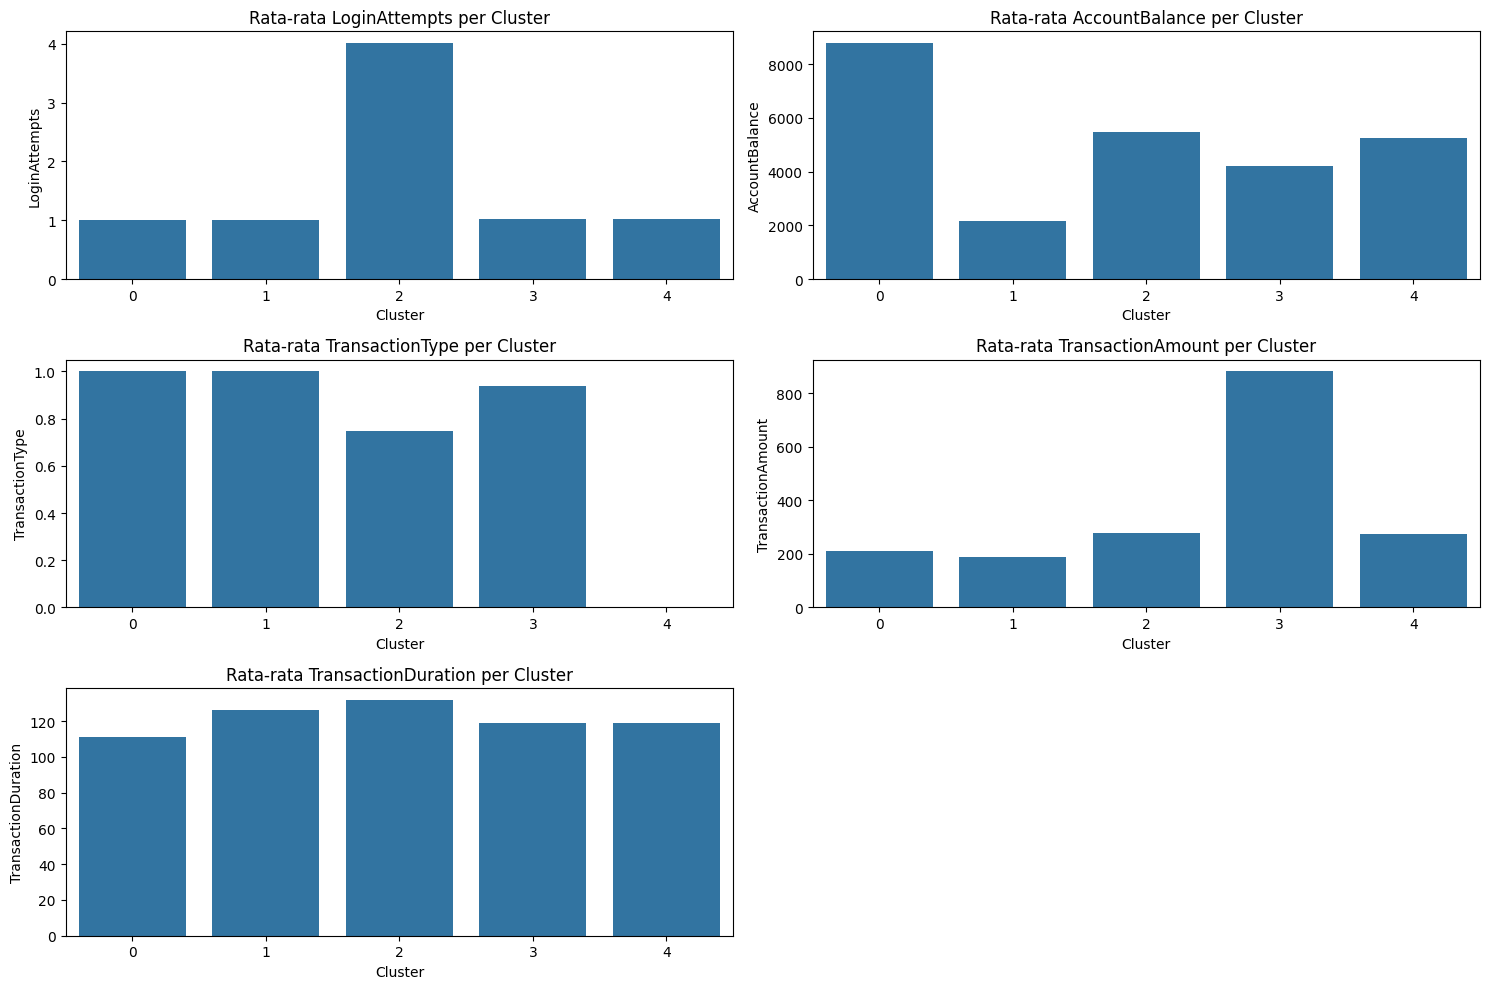

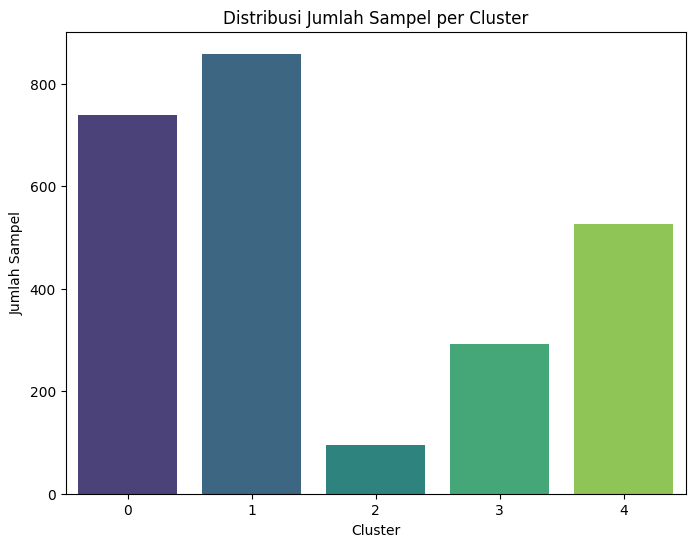

In [44]:
# Set ukuran figure
plt.figure(figsize=(15, 10))
# Loop untuk setiap fitur numerik
for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)  # Buat subplot
    sns.barplot(x=df_original['Cluster'], y=df_original[col], estimator=np.mean, ci=None)
    plt.title(f"Rata-rata {col} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Visualisasi jumlah sampel per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_original, palette='viridis')
plt.title("Distribusi Jumlah Sampel per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Sampel")
plt.show()

In [43]:
# Agregasi numerik (min, max, mean)
numeric_summary = df_original.groupby('Cluster').agg(['min', 'max', 'mean'])

# Agregasi kategorikal (modus)
categorical_summary = df_processed.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode().iloc[0])

# Menampilkan hasil dalam bentuk tabel
print("Ringkasan Numerik Per Cluster:")
display(numeric_summary.style.set_caption("Ringkasan Numerik Per Cluster").format(precision=2))

print("\nRingkasan Kategorikal Per Cluster:")
display(categorical_summary.style.set_caption("Ringkasan Kategorikal Per Cluster"))


Ringkasan Numerik Per Cluster:



Ringkasan Kategorikal Per Cluster:


,TransactionType,Location,Channel,CustomerOccupation
Cluster,,,,
0,1,13,0,0
1,1,5,0,3
2,1,13,2,0
3,1,8,0,3
4,0,2,1,2


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

# Cluster 0 (739 transaksi)
- Rata-rata Transaction Amount: $210.67

- Rata-rata Transaction Duration: 111 detik

- Login Attempts: Rata-rata 1 kali

- Rata-rata Account Balance: $8789.02

- Analisis: Cluster ini mencakup akun dengan saldo tinggi dan transaksi bernilai sedang. Hampir tidak ada indikasi aktivitas mencurigakan karena login attempts tetap rendah.

# Cluster 1 (859 transaksi)
- Rata-rata Transaction Amount: $189.31

- Rata-rata Transaction Duration: 126 detik

- Login Attempts: Rata-rata 1 kali

- Rata-rata Account Balance: $2146.09

- Analisis: Akun dengan saldo relatif rendah dan transaksi bernilai lebih kecil. Tidak ada pola mencurigakan dalam login attempts.

# Cluster 2 (95 transaksi) (Berpotensi Fraudulent)
- Rata-rata Transaction Amount: $276.32 (lebih tinggi dari cluster lain)

- Rata-rata Transaction Duration: 131 detik

- Login Attempts: 4 kali (signifikan lebih tinggi dari cluster lain)

- Rata-rata Account Balance: $5461.64

- Analisis: Cluster ini memiliki jumlah transaksi relatif tinggi dan jumlah login attempts yang jauh lebih banyak. Kemungkinan besar mengandung aktivitas mencurigakan seperti upaya masuk berulang ke akun atau transaksi mencurigakan.

# Cluster 3 (293 transaksi)
- Rata-rata Transaction Amount: $882.25 (paling tinggi di antara cluster)

- Rata-rata Transaction Duration: 118 detik

- Login Attempts: - Rata-rata 1 kali

- Rata-rata Account Balance: $4199.76

- Analisis: Akun dengan transaksi terbesar, tapi login attempts tetap rendah. Bisa jadi pelanggan premium atau akun dengan transaksi sah berjumlah besar.

# Cluster 4 (526 transaksi)
- Rata-rata Transaction Amount: $274.72

- Rata-rata Transaction Duration: 119 detik

- Login Attempts: - Rata-rata 1 kali

- Rata-rata Account Balance: $5245.55

- Analisis: Mirip dengan cluster 2 tapi dengan login attempts normal. Akun dengan saldo menengah dan transaksi cukup besar.

# Kesimpulan & Indikasi Fraud
Cluster 2 kemungkinan besar mengandung aktivitas fraud, karena :
- Rata-rata login attempts 4 kali lebih tinggi dari cluster lain.
- Nilai transaksi lebih tinggi daripada cluster lain.

Cluster 3 memiliki transaksi tertinggi, tapi tanpa tanda-tanda fraud karena login attempts tetap rendah.

Cluster 0, 1, dan 4 tampak seperti akun normal, dengan jumlah transaksi dan saldo sesuai pola umum.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [46]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,4


In [35]:
df.to_csv('bank_transactions_clustered.csv', index=False)
print("Dataset with cluster labels saved to 'bank_transactions_clustered.csv'")

Dataset with cluster labels saved to 'bank_transactions_clustered.csv'
